# Transfer learning

## Try a pre-trained model on random (AI-generated) pics

In [1]:
from keras.utils import load_img, img_to_array
from keras.applications.resnet50 import ResNet50

pretrained_model = ResNet50(weights='imagenet')
print(pretrained_model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


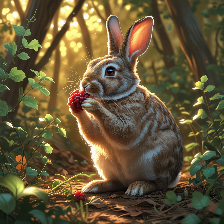

In [2]:
size_ResNet = (224, 224)
img_path = "../data/leonardo_rabbit.jpg"
img = load_img(img_path, target_size=size_ResNet)
img

In [3]:
x = img_to_array(img)
x.shape

(224, 224, 3)

In [4]:
# make sure it is one sample with 3 dimensions
import numpy as np

x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [5]:
preds = pretrained_model.predict(x)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


(1, 1000)

In [6]:
from keras.applications.resnet50 import decode_predictions
decoded_preds = decode_predictions(preds, top=3)
for i in decoded_preds[0]:
    print(f"{i[1]} with prob {i[2]:.2%}")

hare with prob 63.79%
wood_rabbit with prob 16.97%
tiger_cat with prob 8.15%


## Apply transfer learning for a "real" task

Fun [story](https://youtu.be/vIci3C4JkL0) from HBO's Silicon Valley series from 2017: Shazam for food.

Download the data from [Kaggle](https://www.kaggle.com/datasets/dansbecker/hot-dog-not-hot-dog).

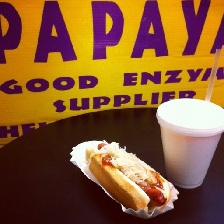

In [7]:
from os import path

folder_where_data_resides = "../data/hotdog/"

# Look at an example hot_dog:
hot_dog = load_img(path.join(folder_where_data_resides, "train/hot_dog/1000288.jpg"), target_size=size_ResNet)
hot_dog

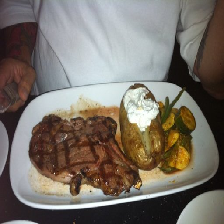

In [8]:
# Look at an example not hot_dog
not_hot_dog = load_img(path.join(folder_where_data_resides, "train/not_hot_dog/100135.jpg"), target_size=size_ResNet)
not_hot_dog

In [9]:
def preprocess_image(img):
    return np.expand_dims(img_to_array(img), axis=0)

def predict_top_classes(preprocessed_img):
    preds = pretrained_model.predict(preprocessed_img)
    decoded_preds = decode_predictions(preds, top=3)
    for i in decoded_preds[0]:
        print(f"{i[1]} with prob {i[2]:.2%}")


In [10]:
print("Prediction for a sample hot dog:")
predict_top_classes(preprocess_image(hot_dog))

print("\nPrediction for a sample not hot dog:")
predict_top_classes(preprocess_image(not_hot_dog))

Prediction for a sample hot dog:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
ice_lolly with prob 98.51%
pop_bottle with prob 0.60%
torch with prob 0.16%

Prediction for a sample not hot dog:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
bolo_tie with prob 21.49%
lampshade with prob 18.60%
buckle with prob 17.34%


### Load the whole data in batches

In [11]:
# Load data
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(path.join(folder_where_data_resides, "train"), batch_size=32, image_size=size_ResNet)
test_dataset = image_dataset_from_directory(path.join(folder_where_data_resides, "train"), batch_size=32, image_size=size_ResNet)

train_dataset

Found 498 files belonging to 2 classes.
Found 498 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
for images, labels in train_dataset.take(1):
    print("Batch shape:", images.shape, labels.shape)

Batch shape: (32, 224, 224, 3) (32,)


2025-03-24 18:42:14.799763: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


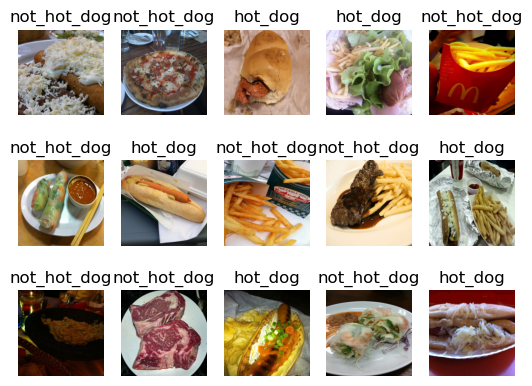

2025-03-24 18:42:25.226002: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
import matplotlib.pyplot as plt
from keras.utils import array_to_img

# Take 1 batch and look for the first 15 images:
for images, labels in train_dataset.take(1):
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(array_to_img(images[i]))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")
    plt.show()

### Build a CNN for this task from scratch

**TODO**: Build a CNN model from scratch and evaluate its performance.

In [ ]:
# Use the model we ended up with the digit recognition example
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Build the model

# Compile the model and print summary

# Fit the model (with early stopping) and look at validation accuracy


### Fine-tune a pre-defined model for our task

We can fine-tune a pre-trained model for our purposes by modifying the last few layers, and learn only the new parameters on new data (freezing the weights of the original network).

In [14]:
# Load pre-trained ResNet50 model without the top layer as we do not want to classify for 1000 classes but only simple binary
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=size_ResNet + (3,))  # concatenating tuples to account for three channels

print(base_model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


Some of the parameters are non-trainable: these correspond to batch normalization layers that applies a transformation to maintain the mean output close to 0 and the output standard deviation close to 1. Mean and standard deviation are parameters that are not updated during backpropagation.

In [15]:
# Freeze the layers of the pre-trained model
base_model.trainable = False

len(base_model.trainable_variables)

0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

fine_tuned_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
fine_tuned_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

print(fine_tuned_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [17]:
from keras.callbacks import EarlyStopping

# Fit the fine-tuned the model (batch size already defined)
fine_tuned_model.fit(train_dataset, epochs=10, validation_data=test_dataset, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])

# Evaluate the model
loss, accuracy = fine_tuned_model.evaluate(test_dataset)
print(f"\nTest accuracy: {accuracy:.2%}")

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7297 - loss: 0.5898 - val_accuracy: 0.8735 - val_loss: 0.3117
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8762 - loss: 0.2892 - val_accuracy: 0.9137 - val_loss: 0.1982
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9109 - loss: 0.1785 - val_accuracy: 0.9839 - val_loss: 0.0774
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9657 - loss: 0.1020 - val_accuracy: 0.9920 - val_loss: 0.0501
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9925 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 0.0258
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 0.0218
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 1.0000 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss:

Modern LLMs also follow the transfer learning pattern: they are pre-trained on vast amounts of general data (basically: the internet), then are fine-tuned on specific tasks.